In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from bs4 import BeautifulSoup, SoupStrainer
import sys, string, requests, datetime, time
%matplotlib inline

In [2]:
players_merged_df = pd.read_csv('Tables/players_merged_df.csv')

Here are the features from the dataframe:
- name: full name of player, first name and last name
- active_from: year started playing for the NBA
- active_to: last year playing for the NBA (2018 is still active)
- birth_date: datetime variable, date of birth
- position: five positions classification - most common approach in modern ear
- trad_position: three positions classification - traditional approach of describing positions
- ppg: float variable, total points per game
- trb: float variable, total rebounds per game
- ast: float variable, total assists per game
- height_inches: float variable, height measured in inches
- weight: float variable, weight measured in pounds
- shooting hand: prefered shooting hand
- college: college basketball programs of participation
- hs_name: name of high school attended
- hs_city: city of high school location
- hs_state: state or country (if foreign player) of high school
- url: player page in www.basketball-reference.com

In [3]:
players_merged_df.head()

,name,active_from,active_to,birth_date,position,trad_position,ppg,trb,ast,height_inches,weight,shooting_hand,college,hs_name,hs_city,hs_state,url
0,Alaa Abdelnaby,1991,1995,1968-06-24,Power Forward,Forward,5.7,3.3,0.3,82.0,240.0,Right,Duke University,Bloomfield,Bloomfield,New Jersey,/players/a/abdelal01.html
1,Zaid Abdul-Aziz,1969,1978,1946-04-07,Center,Center,9.0,8.0,1.2,81.0,235.0,Right,Iowa State University,John Jay,Brooklyn,New York,/players/a/abdulza01.html
2,Kareem Abdul-Jabbar,1970,1989,1947-04-16,Center,Center,24.6,11.2,3.6,86.0,225.0,Right,"University of California, Los Angeles",Power Memorial,New York,New York,/players/a/abdulka01.html
3,Mahmoud Abdul-Rauf,1991,2001,1969-03-09,Point Guard,Guard,14.6,1.9,3.5,73.0,162.0,Right,Louisiana State University,Gulfport,Gulfport,Mississippi,/players/a/abdulma02.html
4,Tariq Abdul-Wahad,1998,2003,1974-11-03,Shooting Guard,Guard,7.8,3.3,1.1,78.0,223.0,Right,"University of Michigan, San Jose State University",Lycee Aristide Briand,Evreux,France,/players/a/abdulta01.html


## Data visualization

### Individual statistics

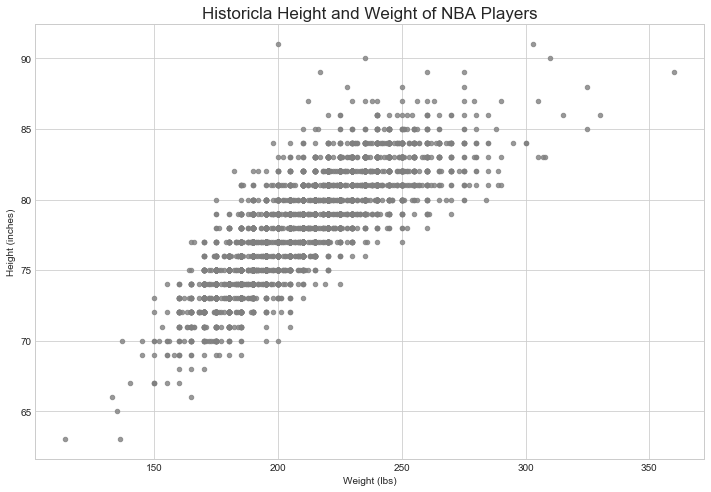

In [4]:
plt.figure(figsize=(12,8))

ax = sns.regplot(x='weight', y='height_inches', data=players_merged_df, 
                 color='grey', fit_reg=False, scatter_kws={"s": 20})

ax.set(xlabel='Weight (lbs)', ylabel='Height (inches)')
plt.rcParams["axes.labelsize"] = 15
plt.title('Historicla Height and Weight of NBA Players', fontsize=17)

plt.show()

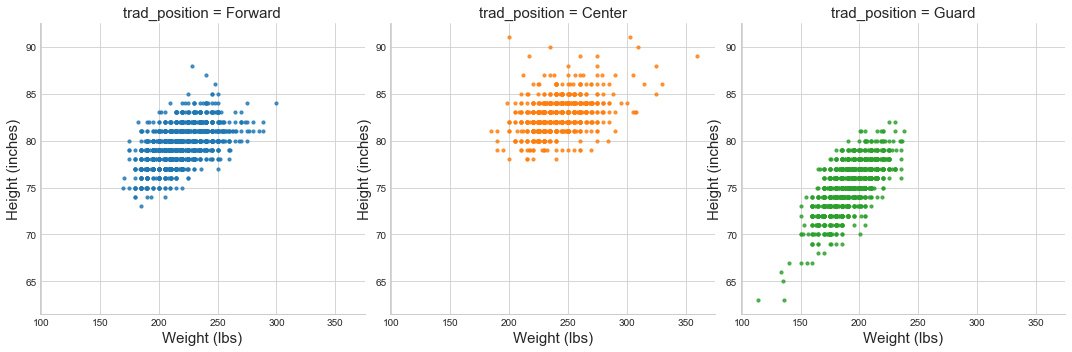

In [5]:
ax = sns.lmplot(x="weight", y="height_inches", data=players_merged_df, 
               col='trad_position', hue='trad_position',
               x_jitter=.1, fit_reg=False, scatter_kws={"s": 10})

ax.set(xlabel='Weight (lbs)', ylabel='Height (inches)')

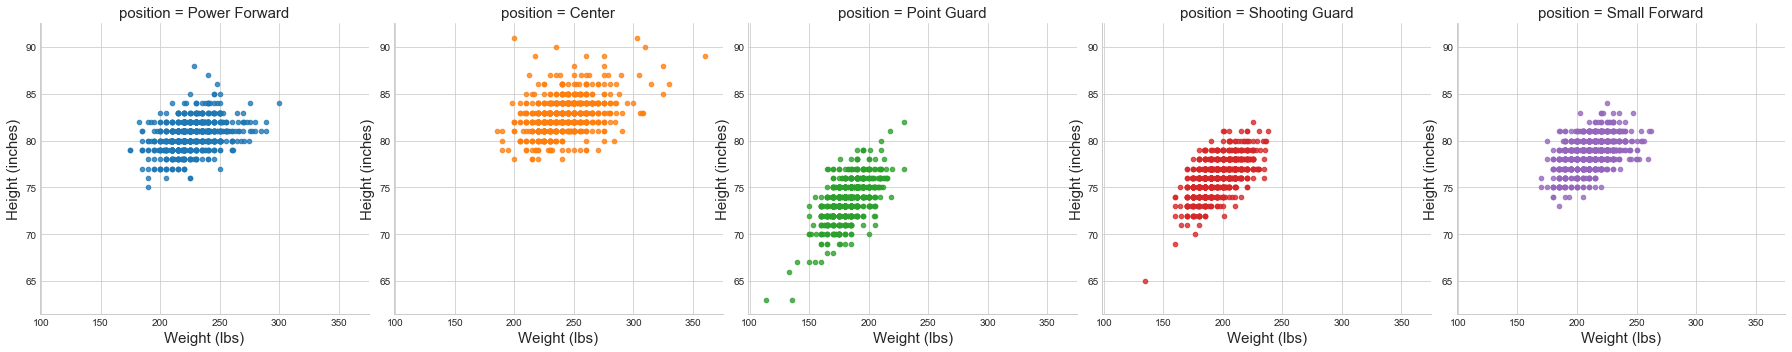

In [6]:
ax = sns.lmplot(x="weight", y="height_inches", data=players_merged_df, 
               col='position', hue='position',
               x_jitter=.1, fit_reg=False, scatter_kws={"s": 21})

ax.set(xlabel='Weight (lbs)', ylabel='Height (inches)')

In [7]:
ax = players_feat.groupby('position').count()['trad_position'].plot.bar(figsize=(12,7), rot=0)
ax.set(xlabel='Basketball Position', ylabel='Number of Players')

NameError: name 'players_feat' is not defined

In [ ]:
top_colleges = players_merged_df['college'].value_counts()[:20]
top_colleges_df = pd.DataFrame(top_colleges)
top_colleges_df.columns = ['Count']

plt.figure(figsize=(16,12))
sns.barplot(x='Count', y=top_colleges_df.index, data=top_colleges_df, palette="Blues_d")
plt.title('Number of NBA Players by College', fontsize=20)
plt.ylabel('College', fontsize=15)
plt.gca().set_yticks([]);

for num in range(len(top_colleges)):
    plt.text(top_colleges[num]-4, num, top_colleges[num], color='white', size=13, verticalalignment='center')
    plt.text(1, num, top_colleges.index[num], color='white', size=13, verticalalignment='center')

In [ ]:
top_hs_cities = players_merged_df['hs_city'].value_counts()[:20]
top_hs_cities_df = pd.DataFrame(top_hs_cities)
top_hs_cities_df.columns = ['Count']

plt.figure(figsize=(16,12))
sns.barplot(x='Count', y=top_hs_cities_df.index, data=top_hs_cities_df, palette="Blues_d")
plt.title('Number of NBA Players by High School City', fontsize=20)
plt.ylabel('High School City', fontsize=15)
plt.gca().set_yticks([]);

for num in range(len(top_hs_cities)):
    plt.text(top_hs_cities[num]-4, num, top_hs_cities[num], color='white', size=13, verticalalignment='center')
    plt.text(1, num, top_hs_cities.index[num], color='white', size=13, verticalalignment='center')

## Model data for Machine Learning regression

In [8]:
players_feat = players_merged_df[['position', 'trad_position', 'ppg', 'trb', 'ast', 'height_inches', 'weight']].copy()

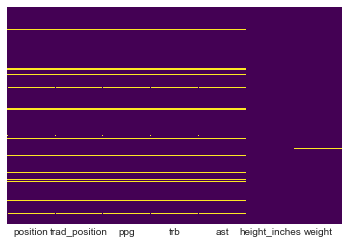

In [9]:
sns.heatmap(players_feat.isnull(), yticklabels=False, cbar=False, cmap='viridis')

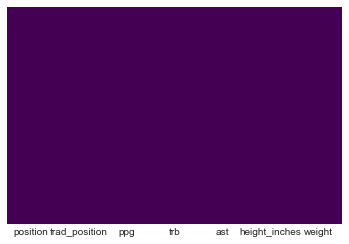

In [10]:
players_feat = players_feat.dropna()
sns.heatmap(players_feat.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Basketball positions are also numbered starting with the point guard:
- 1: floor general (point guard, combo guard)
- 2: wing (shooting guard, guard-forward, swingman)
- 3: wing (small forward, point forward)
- 4: post (power forward, stretch four, combo forward)
- 5: pivot (center, forward-center)

Often coaches and players will call the positions by numbers stead of names, especially for players who can play both positions. For example, a player who has the attributes of a point guard (1) and shooting guard (2) and can play both positions are sometimes called combo guard (1-2 guard). The numbers also correspond to weight/height of a player (as seen above) and their playing styles (higher number typically means more rebounds and less assists). We can convert the position (string values) in a pandas dataframe to a unique integer (pos_num) so that the algorithms can better perform.

In [11]:
players_feat['pos_num'] = players_feat['position'].map({'Point Guard': 1,
                                                       'Shooting Guard': 2,
                                                       'Small Forward': 3,
                                                       'Power Forward': 4,
                                                       'Center': 5})

In [12]:
players_feat.head()

,position,trad_position,ppg,trb,ast,height_inches,weight,pos_num
0,Power Forward,Forward,5.7,3.3,0.3,82.0,240.0,4
1,Center,Center,9.0,8.0,1.2,81.0,235.0,5
2,Center,Center,24.6,11.2,3.6,86.0,225.0,5
3,Point Guard,Guard,14.6,1.9,3.5,73.0,162.0,1
4,Shooting Guard,Guard,7.8,3.3,1.1,78.0,223.0,2


## Model data for Machine Learning regression

### Position Number (1 - 5)

In [13]:
from sklearn.model_selection import train_test_split
X = players_feat[['ppg', 'trb', 'ast', 'height_inches', 'weight']]
y = players_feat['pos_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

# print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.702943105336028


In [15]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

# print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.7921879719938255


### Modern Five Positions

In [16]:
from sklearn.model_selection import train_test_split
X = players_feat[['ppg', 'trb', 'ast', 'height_inches', 'weight']]
y = players_feat['position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<font color='blue'>Logistic Regression Model</font>

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

                precision    recall  f1-score   support

        Center       0.56      0.80      0.66       216
   Point Guard       0.68      0.77      0.72       252
 Power Forward       0.44      0.16      0.24       243
Shooting Guard       0.59      0.48      0.53       297
 Small Forward       0.47      0.61      0.53       278

   avg / total       0.55      0.56      0.54      1286



[[173   0  21   0  22]
 [  0 195   1  47   9]
 [112   0  40   3  88]
 [  1  81   2 144  69]
 [ 22  10  27  50 169]]


<font color='blue'>Decision Tree Classifier</font>

In [18]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

                precision    recall  f1-score   support

        Center       0.63      0.70      0.66       216
   Point Guard       0.68      0.67      0.67       252
 Power Forward       0.47      0.44      0.46       243
Shooting Guard       0.52      0.52      0.52       297
 Small Forward       0.47      0.47      0.47       278

   avg / total       0.55      0.55      0.55      1286



[[151   0  52   0  13]
 [  0 168   1  71  12]
 [ 74   2 107   7  53]
 [  2  69   3 154  69]
 [ 13   7  64  62 132]]


<font color='blue'>Naive Bayes</font>

In [19]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

                precision    recall  f1-score   support

        Center       0.74      0.68      0.71       216
   Point Guard       0.70      0.68      0.69       252
 Power Forward       0.56      0.58      0.57       243
Shooting Guard       0.55      0.53      0.54       297
 Small Forward       0.59      0.65      0.62       278

   avg / total       0.62      0.62      0.62      1286



[[146   0  67   0   3]
 [  0 171   0  79   2]
 [ 46   0 140   2  55]
 [  0  70   4 157  66]
 [  4   4  40  50 180]]


### Traditional Three Positions

In [20]:
from sklearn.model_selection import train_test_split
X = players_feat[['ppg', 'trb', 'ast', 'height_inches', 'weight']]
y = players_feat['trad_position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

     Center       0.61      0.33      0.43       223
    Forward       0.66      0.75      0.70       523
      Guard       0.85      0.89      0.87       540

avg / total       0.73      0.74      0.72      1286



[[ 73 147   3]
 [ 47 394  82]
 [  0  59 481]]


In [22]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

     Center       0.63      0.67      0.65       223
    Forward       0.68      0.69      0.68       523
      Guard       0.85      0.82      0.83       540

avg / total       0.74      0.74      0.74      1286



[[150  72   1]
 [ 87 359  77]
 [  2  97 441]]


In [23]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

     Center       0.76      0.75      0.75       223
    Forward       0.77      0.78      0.77       523
      Guard       0.88      0.87      0.88       540

avg / total       0.81      0.81      0.81      1286



[[167  56   0]
 [ 53 406  64]
 [  0  68 472]]


### Year-by-year statistics

In [25]:
left = []
right = []
height = []
weight = []
ppg = []
trb = []
ast = []

start = players_merged_df.active_from.min()
end = players_merged_df.active_from.max()

for year in range(start,end):
    active = (players_merged_df.active_from.values <= year) & (players_merged_df.active_to >= year) # only include active players
    height.append(np.mean(players_merged_df[active].height_inches)) # average height in inches
    weight.append(np.mean(players_merged_df[active].weight)) # average weight in pounds
    left.append(1.0*np.sum(players_merged_df[active].shooting_hand == 'Left')) # number of left handed shooters
    right.append(1.0*np.sum(players_merged_df[active].shooting_hand == 'Right')) # number of right handed shooters
    ppg.append(np.mean(players_merged_df[active].ppg))
    trb.append(np.mean(players_merged_df[active].trb))
    ast.append(np.mean(players_merged_df[active].ast))
    
# create a DataFrame with a summary
stats_year = pd.DataFrame({'season': np.arange(start,end), 
                          'height': height,
                          'weight': weight,
                          'left': left,
                          'right': right,
                          'ppg': ppg,
                          'trb': trb,
                          'ast': ast}).set_index('season')

# preview
stats_year.head(10)

,ast,height,left,ppg,right,trb,weight
season,,,,,,,
1947,1.721739,74.322981,1.0,9.339130,22.0,3.791304,188.656250
1948,1.925000,74.570175,1.0,8.993750,31.0,3.671875,187.362832
1949,1.944444,75.197740,3.0,8.674603,60.0,3.974603,191.536723
1950,2.021138,75.324444,5.0,8.518699,118.0,4.040650,191.493274
1951,1.930065,75.843137,6.0,8.183660,147.0,3.984314,194.549020
1952,2.009231,75.984615,6.0,8.163077,124.0,4.295385,195.253846
1953,2.008462,75.730769,5.0,8.071538,125.0,4.289231,194.476923
1954,1.958261,76.304348,2.0,8.189565,113.0,4.500870,196.719298
1955,2.037500,76.401786,2.0,8.560714,110.0,4.698214,196.714286


In [26]:
stats_year.to_csv('Tables/stats_year.csv', index=False)

In [27]:
stats_year = pd.read_csv('Tables/stats_year.csv')

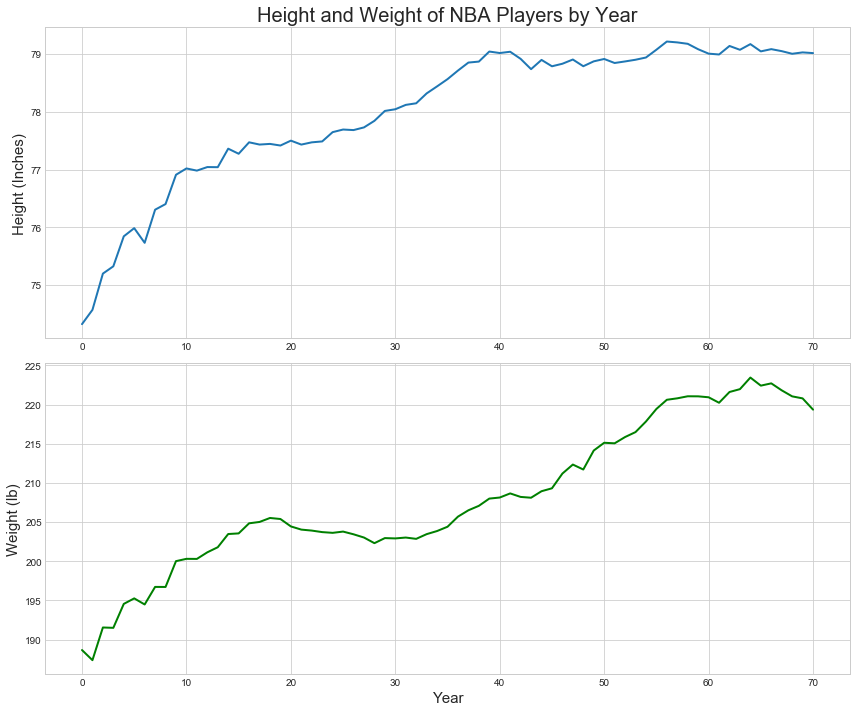

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12,10))

plt.subplot(2, 1, 1)
plt.title('Height and Weight of NBA Players by Year', fontsize = 20)

plt.plot(stats_year['height'], linewidth=2.0)
plt.ylabel("Height (Inches)", fontsize=15)


plt.subplot(2, 1, 2)
plt.plot(stats_year['weight'], linewidth=2.0, color='g')
plt.ylabel('Weight (lb)', fontsize=15)
plt.xlabel('Year', fontsize=15)

plt.tight_layout()
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X = stats_year.drop('ppg', axis=1)
y = stats_year['ppg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

# print(lm.score(X_train, y_train))
print("R2 Score: ", lm.score(X_test, y_test))

R2 Score:  0.8616458276829619
